In [1]:
import keras.models
import os
import bregnn.io as io
import bregnn.utils as utils
import sys
import json
from optparse import OptionParser, make_option
sys.path.insert(0, '/users/nchernya/HHbbgg_ETH/bregression/python/')
import datetime



Using TensorFlow backend.


In [2]:
inp_dir='./files_PhotonRegNN_applied/'
inp_file='applied_res_2018-02-28_Ntup_10Nov_Photon_test_1_EB.hd5'
data = io.read_data('%s%s'%(inp_dir,inp_file),columns=None)
data.describe()

,response,resolution,scIsEB,genEnergy,scRawEnergy,scEtaWidth,scPhiWidth,full5x5_e5x5,hadronicOverEm,rhoValue,...,eventNumber,run,luminosityBlock,pt,scEta,corrEnergy74X,corrEnergy74XError,gsfnhits,ptWeightCut,response_NN_mse
count,200.000000,200.000000,200.0,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,...,200.000000,200.0,200.000000,200.000000,200.000000,200.000000,200.000000,2.000000e+02,200.000000,200.000000
mean,1.016521,0.011689,1.0,217.344147,213.035767,0.008954,0.018943,0.967050,0.006185,12.370980,...,79688.680000,1.0,442.315000,155.191711,-0.064591,214.602722,2.085026,4.575380e-41,0.335000,1.025393
std,0.049003,0.017174,0.0,121.201126,120.942642,0.001805,0.018123,0.082470,0.022100,9.508142,...,203.305418,0.0,1.039798,83.250397,0.878960,120.656464,3.732202,0.000000e+00,0.473175,0.087258
min,0.978114,0.003962,1.0,10.623412,9.845073,0.002930,0.006791,0.441338,0.000000,0.000000,...,79334.000000,1.0,441.000000,10.018267,-1.473105,10.903418,0.148973,4.575380e-41,0.000000,0.988826
25%,0.996112,0.005365,1.0,110.060640,104.506468,0.008004,0.009589,0.980564,0.000000,4.807027,...,79509.500000,1.0,441.000000,81.483456,-0.845103,108.969730,0.900065,4.575380e-41,0.000000,0.999956
50%,1.002150,0.006609,1.0,215.989395,210.759941,0.008677,0.011251,0.990219,0.000000,10.383588,...,79685.500000,1.0,442.000000,150.758232,-0.037804,213.708694,1.378971,4.575380e-41,0.000000,1.003568
75%,1.013088,0.009179,1.0,298.101074,297.343483,0.009916,0.021441,0.992400,0.004973,18.335761,...,79856.000000,1.0,443.000000,232.018246,0.745138,296.933914,2.001036,4.575380e-41,1.000000,1.015417
max,1.400152,0.139233,1.0,623.619141,624.738464,0.021070,0.133723,1.051460,0.229822,38.195148,...,80045.000000,1.0,444.000000,292.185394,1.461612,626.392090,37.037678,4.575380e-41,1.000000,1.945038


In [3]:
y = (data['genPt']/data['pt']).values.reshape(-1,1)
X_pt = (data['pt']).values.reshape(-1,1)
X_eta = (data['scEta']).values.reshape(-1,1)
#res = (data['resolution_NN_%s'%input_trainings[0]])                                                                                                                                                                                        
response = (data['scRawEnergy']*data['response']).values.reshape(-1,1)
response_NN = (data['scRawEnergy']*data['response_NN_mse']).values.reshape(-1,1)
response_NN_value = (data['response_NN_mse']).values.reshape(-1,1)
gen_energy = (data['genEnergy']).values.reshape(-1,1)
raw_energy = (data['scRawEnergy']).values.reshape(-1,1)

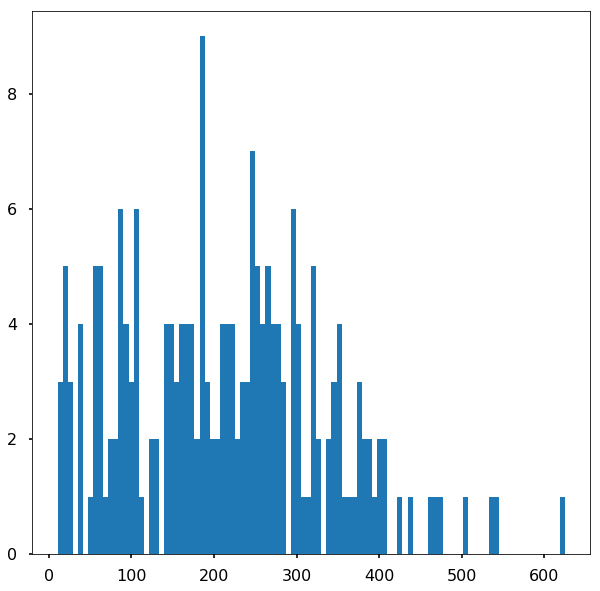

In [4]:
plt.hist(response,bins=100);plt.show()

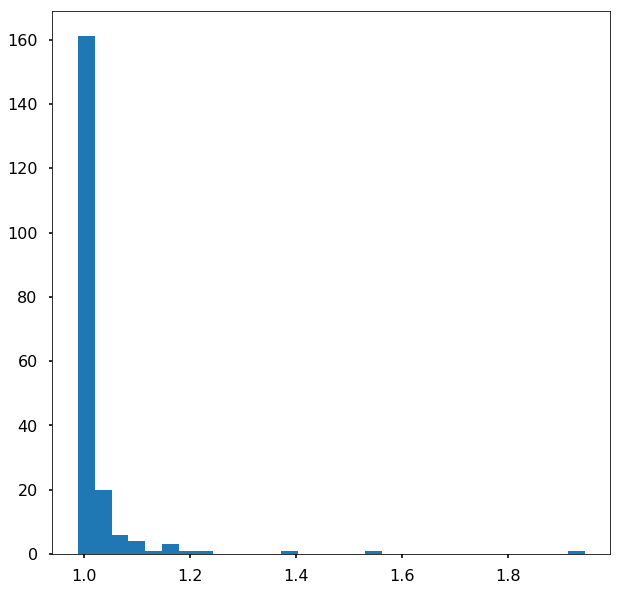

In [5]:
plt.hist(response_NN_value,bins=30);plt.show()

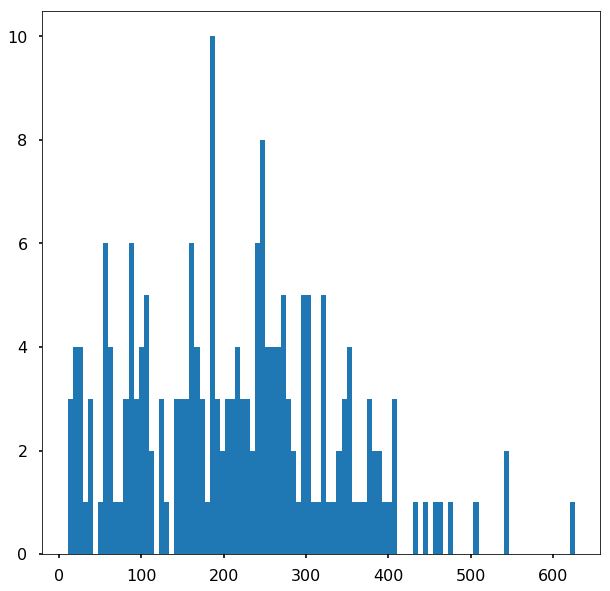

In [6]:
plt.hist(response_NN,bins=100);plt.show()

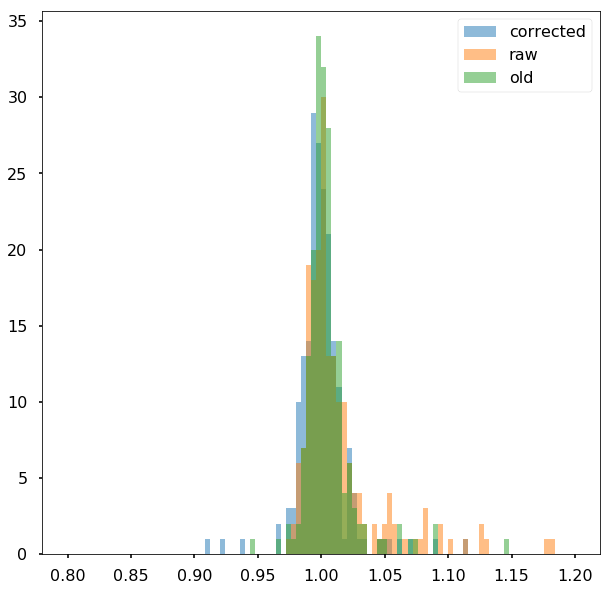

In [17]:
plt.hist(gen_energy/response_NN,bins=100,range=(0.8,1.2),alpha=0.5,log=False,label='corrected');
plt.hist(gen_energy/raw_energy,bins=100,range=(0.8,1.2),alpha=0.5,log=False,label='raw');
plt.hist(gen_energy/response,bins=100,range=(0.8,1.2),alpha=0.5,log=False,label='old');
plt.legend(loc='upper right');
plt.show()

In [37]:
y = (data['genEnergy']/data['scRawEnergy']).values.reshape(-1,1)
y_mean = np.median(y)

print(np.where(y<1.5))
y_std = y[np.where(y<3)].std()
print(y_mean)
print(y_std)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  13,  14,
        15,  16,  17,  19,  22,  24,  25,  26,  27,  28,  29,  30,  31,
        32,  33,  34,  35,  36,  37,  38,  40,  41,  43,  47,  48,  49,
        50,  51,  52,  53,  58,  59,  60,  61,  63,  64,  65,  66,  67,
        68,  71,  72,  73,  75,  77,  78,  79,  80,  81,  84,  85,  86,
        87,  88,  89,  90,  91,  92,  94,  95,  96,  97,  98,  99, 100,
       101, 105, 107, 111, 113, 114, 115, 116, 117, 118, 120, 121, 122,
       123, 124, 129, 131, 132, 135, 136, 137, 143, 144, 145, 146, 147,
       148, 149, 150, 152, 153, 156, 158, 159, 160, 161, 162, 164, 165,
       167, 168, 172, 173, 174, 176, 177, 180, 183, 186, 187, 191, 193,
       195, 196, 198, 199]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 